<a href="https://colab.research.google.com/github/ThuanPhong0126/PaternRecognize-project-cs338/blob/main/Doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/[]Nhan Dang/Question-Similarity

/content/drive/MyDrive/[]Nhan Dang/Question-Similarity


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/train.csv")
train

,id,qid1,qid2,question1,question2,is_duplicate
0,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
1,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
2,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
3,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
4,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
...,...,...,...,...,...,...
244285,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
244286,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
244287,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
244288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
sentences = list(train.question1) + list(train.question2)

In [ ]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    s = str(s)
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['what',
  'is',
  'the',
  'story',
  'of',
  'kohinoor',
  '(',
  'koh-i-noor',
  ')',
  'diamond',
  '?'],
 ['how',
  'can',
  'i',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'a',
  'vpn',
  '?'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar',
  ',',
  'salt',
  ',',
  'methane',
  'and',
  'carbon',
  'di',
  'oxide',
  '?'],
 ['astrology',
  ':',
  'i',
  'am',
  'a',
  'capricorn',
  'sun',
  'cap',
  'moon',
  'and',
  'cap',
  'rising',
  '...',
  'what',
  'does',
  'that',
  'say',
  'about',
  'me',
  '?'],
 ['when', 'do', 'you', 'use', 'シ', 'instead', 'of', 'し', '?'],
 ['motorola',
  '(',
  'company',
  ')',
  ':',
  'can',
  'i',
  'hack',
  'my',
  'charter',
  'motorolla',
  'dcx3400',
  '?'],
 ['how', 'do', 'i', 'read', 'and', 'find', 'my', 'youtube', 'comments', '?'],
 ['what', 'can', 'make', 'physics', 'easy', 'to', 'learn', '?'],
 ['what',
  'are',
  'the',
  'laws',
  'to',
  

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
'''

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [ ]:
dev = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/dev.csv")
test = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/Quora dataset/test.csv")

In [ ]:
predict_similarity = []
question1 = [str(s) for s in list(train.question1)]
question2 = [str(s) for s in list(train.question2)]
for idx, q1 in enumerate(question1):
  q2 = question2[idx]
  q1_doc = word_tokenize(q1.lower())
  q2_doc = word_tokenize(q2.lower())
  vector1 = model.infer_vector(q1_doc)
  vector2 = model.infer_vector(q2_doc)
  predict_similarity.append(cosine(vector1, vector2))

In [ ]:
ensemble_train = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv")
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency,tfidf
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624,0.790132
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216,0.274691
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744,0.243344
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276,0.487620
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316,0.811930
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616,0.693523
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171,0.631680
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314,0.000000


In [ ]:
ensemble_train['doc2vec'] = predict_similarity
ensemble_train

,distilbert-base-nli-stsb-quora-ranking,paraphrase-distilroberta-base-v2,paraphrase-mpnet-base-v2,paraphrase-MiniLM-L12-v2,nli-mpnet-base-v2,is_duplicate,paraphrase-TinyBERT-L6-v2,paraphrase-MiniLM-L6-v2,stsb-mpnet-base-v2,distiluse-base-multilingual-cased-v1,stsb-distilroberta-base-v2,nli-roberta-base-v2,stsb-roberta-base-v2,nli-distilroberta-base-v2,distiluse-base-multilingual-cased-v2,average_word_embeddings_komninos,average_word_embeddings_glove.6B.300d,average_word_embeddings_levy_dependency,tfidf,doc2vec
0,0.696001,0.573700,0.569865,0.528683,0.593448,0,0.677278,0.576335,0.726059,0.584884,0.593941,0.588562,0.599323,0.607856,0.610290,0.874871,0.651956,0.818624,0.790132,0.256102
1,0.644232,0.580639,0.639119,0.665531,0.751989,0,0.586621,0.690827,0.705231,0.794581,0.603158,0.676315,0.562753,0.671447,0.737434,0.847067,0.809579,0.877216,0.274691,0.545460
2,0.524185,0.329884,0.357737,0.372725,0.381514,0,0.424391,0.375748,0.401750,0.474788,0.397911,0.373088,0.251338,0.409317,0.493282,0.768955,0.676888,0.774744,0.243344,0.546606
3,0.797487,0.821957,0.829856,0.820814,0.842494,1,0.817135,0.840911,0.829541,0.864448,0.762922,0.806959,0.720074,0.800717,0.892830,0.819618,0.741882,0.874276,0.487620,0.778570
4,0.405980,0.222970,0.268923,0.360277,0.774101,0,0.167811,0.321182,0.502594,0.712492,0.448202,0.754384,0.560354,0.657452,0.730754,1.000000,1.000000,1.000001,1.000000,0.601863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244285,0.968404,0.924721,0.971645,0.958220,0.975229,1,0.961037,0.956967,0.970600,0.964372,0.863011,0.903813,0.903206,0.898462,0.965878,0.950473,0.927411,0.965316,0.811930,0.881391
244286,0.567139,0.586432,0.591516,0.550486,0.757204,0,0.686659,0.557353,0.557772,0.854385,0.636474,0.811767,0.604400,0.828141,0.882678,0.946330,0.906133,0.958616,0.693523,0.779803
244287,0.952039,0.947387,0.922788,0.910906,0.922571,1,0.928489,0.914483,0.924535,0.909789,0.923433,0.938677,0.931787,0.924841,0.887078,0.872990,0.941845,0.847171,0.631680,0.917195
244288,0.279280,0.014479,0.007940,-0.103434,0.076680,0,-0.016502,-0.132550,0.040603,0.143299,-0.007328,0.065641,0.044847,0.063082,0.081014,0.545603,0.348115,0.621314,0.000000,0.295946


In [ ]:
ensemble_train.to_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv", index=False)

In [ ]:
ensemble_train = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_train.csv")
ensemble_dev = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_dev.csv")
ensemble_test = pd.read_csv("/content/drive/MyDrive/[]Nhan Dang/Question-Similarity/ensemble_test.csv")

In [ ]:
import seaborn as sns

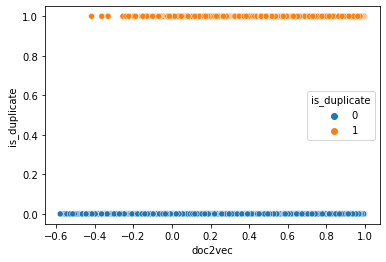

In [ ]:
sns.scatterplot(data = ensemble_train, x="doc2vec", y="is_duplicate", hue="is_duplicate")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def compute_performance(gold, predict):
  return accuracy_score(gold, predict), f1_score(gold, predict), f1_score(gold, predict, average='weighted')

In [ ]:
f1_max, u = 0.0, 0
u_tmp = -0.4
while u_tmp<=1.0:
  predict = []
  for s in ensemble_train['doc2vec']:
    if s<u_tmp: predict.append(0)
    else: predict.append(1)
  acc, f1, _ = compute_performance(ensemble_train['is_duplicate'], predict)
  if f1>f1_max:
    f1_max = f1
    u = u_tmp
    accuracy = acc
  u_tmp += 0.01
print(f"u: {u}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1_max}")

u: 0.5200000000000005
Accuracy: 0.5876171763068484
F1-score: 0.6037890199440732


In [ ]:
predicted = []
for s in ensemble_dev['doc2vec']:
  if s<0.52: predicted.append(0)
  else: predicted.append(1)
compute_performance(ensemble_dev['is_duplicate'], predicted)

(0.5953375, 0.6041597887091449, 0.5927384230892923)

In [ ]:
predicted = []
for s in ensemble_test['doc2vec']:
  if s<0.52: predicted.append(0)
  else: predicted.append(1)
compute_performance(ensemble_test['is_duplicate'], predicted)

(0.59455, 0.605026667640827, 0.5914507746846429)